In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
# Establish and format dataframe

nba_orig_df = pd.read_csv(r'C:\Users\abelg\Documents\Programs\SQL\SSMS\SQL NBA analysis project\NBAdatacleaned.csv')
columns_to_keep = ['year_id', 'fran_id', 'avg_pts', 'avg_opp_pts', 'avg_elo_n', 'avg_opp_elo_n']
nba_orig_df = nba_orig_df[columns_to_keep]

In [3]:
nba_orig_df.head()

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n
0,1995,Bucks,99.341463,103.707317,1368.604789,1497.311587
1,1995,Bulls,101.524390,96.695122,1569.892129,1488.199352
2,1995,Cavaliers,90.451220,89.829268,1542.433391,1498.848261
3,1995,Celtics,102.780488,104.658537,1431.307532,1495.936224
4,1995,Clippers,96.670732,105.829268,1309.053701,1517.260260


In [4]:
# The team to be compared to: Chicago Bulls 1995-2015.

years_df = nba_orig_df[(nba_orig_df['year_id'].between(1995, 2015))]
compare_team_df = years_df[(years_df['fran_id']=='Bulls')]
compare_team_df = compare_team_df.reset_index(drop=True)

In [5]:
# Check Bulls data

display(HTML(compare_team_df.head().to_html()))
print("Number of rows in the data set =", len(compare_team_df))

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n
0,1995,Bulls,101.524390,96.695122,1569.892129,1488.199352
1,1996,Bulls,105.182927,92.939024,1728.695739,1474.171178
2,1997,Bulls,103.146342,92.341463,1788.967095,1479.699006
3,1998,Bulls,96.719512,89.609756,1701.735630,1487.644496
4,1999,Bulls,81.900000,91.360000,1496.791292,1520.258316


Number of rows in the data set = 21


In [6]:
# My team: Jazz 1995-2015

my_years_df = nba_orig_df[(nba_orig_df['year_id'].between(1995, 2015))]
my_team_df = my_years_df[(my_years_df['fran_id']=='Jazz')]
my_team_df = my_team_df.reset_index(drop=True)

In [7]:
# Check Jazz data

display(HTML(my_team_df.head().to_html()))
print("Number of rows in the data set =", len(my_team_df))

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n
0,1995,Jazz,106.414634,98.426829,1649.669379,1492.907237
1,1996,Jazz,102.487805,95.902439,1639.186684,1475.992338
2,1997,Jazz,103.097561,94.304878,1673.285011,1469.093416
3,1998,Jazz,100.963415,94.426829,1673.316002,1475.714854
4,1999,Jazz,93.320000,86.800000,1687.246034,1474.894568


Number of rows in the data set = 21


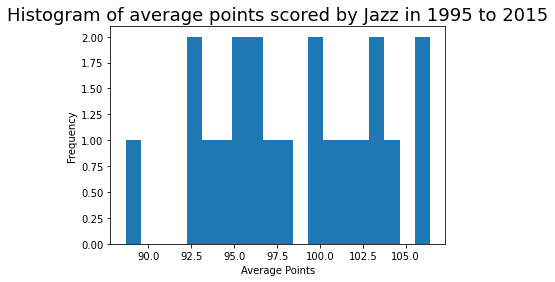

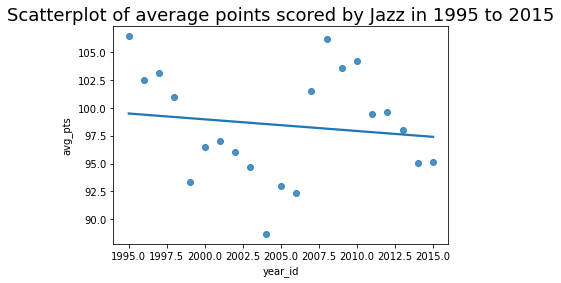

In [10]:
# Visualize Jazz points data with a histogram and scatterplot

import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(my_team_df['avg_pts'], bins=20)
plt.title('Histogram of average points scored by Jazz in 1995 to 2015', fontsize=18)
ax.set_xlabel('Average Points')
ax.set_ylabel('Frequency')
plt.show()
print("")

# Scatterplot
plt.title('Scatterplot of average points scored by Jazz in 1995 to 2015', fontsize=18)
sns.regplot(x=my_team_df['year_id'], y=my_team_df['avg_pts'], ci=None)
plt.show()

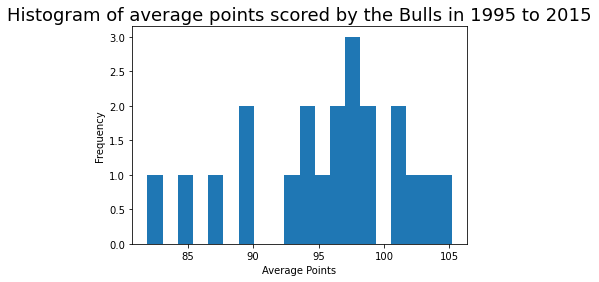

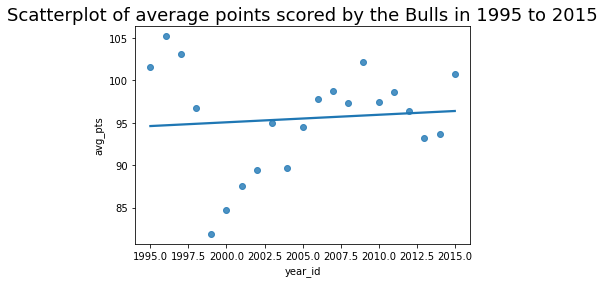

In [11]:
# Visualize Bulls points data with a histogram and scatterplot

import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(compare_team_df['avg_pts'], bins=20)
plt.title('Histogram of average points scored by the Bulls in 1995 to 2015', fontsize=18)
ax.set_xlabel('Average Points')
ax.set_ylabel('Frequency')
plt.show()
print("")

# Scatterplot
plt.title('Scatterplot of average points scored by the Bulls in 1995 to 2015', fontsize=18)
sns.regplot(x=compare_team_df['year_id'], y=compare_team_df['avg_pts'], ci=None)
plt.show()

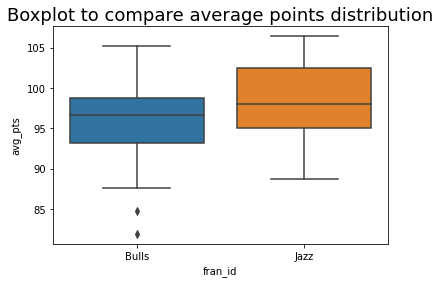

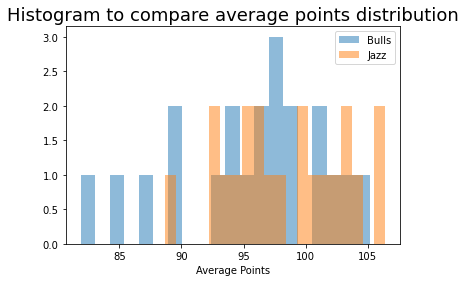

In [12]:
# Visualize the differences in point distribution

import seaborn as sns

# Side by side boxplots
both_teams_df = pd.concat((compare_team_df, my_team_df))
plt.title('Boxplot to compare average points distribution', fontsize=18)
sns.boxplot(x='fran_id', y='avg_pts', data=both_teams_df)
plt.show()
print("")

#Histograms
fig, ax = plt.subplots()
plt.hist(compare_team_df['avg_pts'], 20, alpha=0.5, label='Bulls')
plt.hist(my_team_df['avg_pts'], 20, alpha=0.5, label='Jazz')
plt.title('Histogram to compare average points distribution', fontsize=18)
plt.xlabel('Average Points')
plt.legend(loc='upper right')
plt.show()

In [13]:
# Calculate descriptive statistics on Jazz relative skill

print("Jazz Relative Skill in 1995 to 2015")
print("-----------------------------------------------------")

mean = my_team_df['avg_elo_n'].mean()
median = my_team_df['avg_elo_n'].median()
variance = my_team_df['avg_elo_n'].var()
stddev = my_team_df['avg_elo_n'].std()

print('Mean =', round(mean, 2))
print('Median =', round(median, 2))
print('Variance =', round(variance, 2))
print('Standard Deviation =', round(stddev, 2))

Jazz Relative Skill in 1995 to 2015
-----------------------------------------------------
Mean = 1562.36
Median = 1568.83
Variance = 6959.69
Standard Deviation = 83.42


In [14]:
# Calculate descriptive statistics on the Bulls relative skill

print("Bulls Relative Skill in 1995 to 2015")
print("-----------------------------------------------------")

mean = compare_team_df['avg_elo_n'].mean()
median = compare_team_df['avg_elo_n'].median()
variance = compare_team_df['avg_elo_n'].var()
stddev = compare_team_df['avg_elo_n'].std()

print('Mean =', round(mean, 2))
print('Median =', round(median, 2))
print('Variance =', round(variance, 2))
print('Standard Deviation =', round(stddev, 2))

Bulls Relative Skill in 1995 to 2015
-----------------------------------------------------
Mean = 1511.75
Median = 1498.25
Variance = 20556.73
Standard Deviation = 143.38


In [17]:
# Confidence intervals for the Average Relative Skill of All Teams
# Confidence intervals give a range of values in which the estimated true population parameter exists

print("Confidence Interval for Average Relative Skill (ELO) in 1995 to 2015")
print("--------------------------------------------------------------------------------------------")

# Mean relative skill of all teams
mean = my_years_df['avg_elo_n'].mean()

# Std Dev of the relative skill of all teams
stddev = my_years_df['avg_elo_n'].std()

n = len(my_years_df)

# Confidence Interval
stderr = stddev/(n ** 0.5)
conf_int = st.norm.interval(0.95, mean, stderr)

print("95% confidence interval (unrounded) for ELO in 1995 to 2015 =", conf_int)
print("95% confidence interval (rounded) for ELO in 1995 to 2015 = (", round(conf_int[0], 2),",", round(conf_int[1], 2), ")")

print("\n")
print("Probability a team has an ELO LESS than the ELO of Jazz in 1995 to 2015")
print("--------------------------------------------------------------------------------------------")

my_mean_elo = my_team_df['avg_elo_n'].mean()

#choice1 = st.norm.sf(my_mean_elo, mean, stddev)
choice2 = st.norm.cdf(my_mean_elo, mean, stddev)

#print("Python uses 2 different ways to calculate Normal distribution:")
#print("Choice 1 =", round(choice1, 4))
print(round(choice2, 4)*100, "%")
print("\nThere is a 72.2% chance that a chosen team will have a lower ELO than Jazz")
print("We can see this by comparing their average ELO to the Confidence Interval")
print("Jazz: 1562")
print("All: 1500")

Confidence Interval for Average Relative Skill (ELO) in 1995 to 2015
--------------------------------------------------------------------------------------------
95% confidence interval (unrounded) for ELO in 1995 to 2015 = (1491.6629511769456, 1508.360540751858)
95% confidence interval (rounded) for ELO in 1995 to 2015 = ( 1491.66 , 1508.36 )


Probability a team has an ELO LESS than the ELO of Jazz in 1995 to 2015
--------------------------------------------------------------------------------------------
72.2 %

There is a 72.2% chance that a chosen team will have a lower ELO than Jazz
We can see this by comparing their average ELO to the Confidence Interval
Jazz: 1562
All: 1500
